In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import featuretools as ft


Gets the movie dataset and seperates it by all the unique categories

In [118]:
movies = pd.read_csv("./data/raw/movies.csv")
movies.head()

column_movies = movies['genres']
dic = []

for movie in column_movies:
    parts = movie.split('|')
    for part in parts:
        if part not in dic:
            dic.append(part)
    
dic

['Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Fantasy',
 'Romance',
 'Drama',
 'Action',
 'Crime',
 'Thriller',
 'Horror',
 'Mystery',
 'Sci-Fi',
 'War',
 'Musical',
 'Documentary',
 'IMAX',
 'Western',
 'Film-Noir',
 '(no genres listed)']

In [10]:
links = pd.read_csv("./data/raw/links.csv")
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


This rating data-set can be really useful to help analuze the datat, we know this because the rating could be contingent on several factors. Like the genre of the movie, the popularity of the movie or even the tags that come with the movie. In this case we are using the raiting s to validate if the number of ratings a movie may recieve can group the movie into different categories.

In [147]:
ratings = pd.read_csv("./data/raw/ratings.csv")
df_ratings = ratings[["movieId","userId"]]
df_ratings = df_ratings.groupby(['movieId']).count()
df_ratings2 = ratings[[ "movieId", 'rating']]
# df_ratings2 = df_rati
df_ratings2 = df_ratings2.groupby(['movieId']).mean()

df_rate = pd.merge(df_ratings, df_ratings2, on = 'movieId',how='outer')
df_rate.head()

,userId,rating
movieId,,
1,215,3.920930
2,110,3.431818
3,52,3.259615
4,7,2.357143
5,49,3.071429


In [26]:
tags = pd.read_csv("./data/raw/tags.csv")
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [13]:
merge_df = pd.merge(movies, tags, on = 'movieId')
merge_df.to_csv("df3.csv", index_label=False)
merge_df.head()

,movieId,title,genres,userId,tag,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474,pixar,1137206825
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,567,fun,1525286013
3,2,Jumanji (1995),Adventure|Children|Fantasy,62,fantasy,1528843929
4,2,Jumanji (1995),Adventure|Children|Fantasy,62,magic board game,1528843932


Merge the datasets together.

In [149]:




merge_df_ratings = pd.merge(merge_df, ratings, on = 'movieId')
merge_df_final = pd.merge(merge_df_ratings, links, on = 'movieId')
df = merge_df_final
df.head()

,movieId,title,genres,userId_x,tag,timestamp_x,userId_y,rating,timestamp_y,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764,1,4.0,964982703,114709,862.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764,5,4.0,847434962,114709,862.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764,7,4.5,1106635946,114709,862.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764,15,2.5,1510577970,114709,862.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764,17,4.5,1305696483,114709,862.0


In [113]:
# from sklearn import preprocessing
# le = preprocessing.LabelEncoder()
# le.fit(df['genres'])
# df['genres'] = le.transform(df['genres'])
# le.fit(match_list['team2'])
# match_rankings['team2'] = le.transform(match_rankings['team2'])

Here you see the ratings each genre received on average. There are some ratings on here with higher ratings, but it seems rather distributed across the board, with the 3.5 being a good middle ground.

In [136]:
my_dic = {}
for d in dic:
    test = df[df['genres'].astype(str).str.contains(d,regex=False)]
    test = test[['genres', 'rating']]
    test = test.groupby(['genres']).mean()
    my_dic[d] = test['rating'].mean()
    

my_dic2 = pd.DataFrame.from_dict(my_dic,orient='index', columns = ['rating']) 
my_dic2

,rating
Adventure,3.654360
Animation,3.764138
Children,3.515424
Comedy,3.616587
Fantasy,3.588338
Romance,3.639087
Drama,3.746178
Action,3.623831
Crime,3.737314
Thriller,3.662934


Transform the data to be able to process on a grid

In [138]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(my_dic2.index)
my_dic2.index = le.transform(my_dic2.index)
my_dic2

,rating
2,3.654360
3,3.764138
4,3.515424
5,3.616587
9,3.588338
15,3.639087
8,3.746178
1,3.623831
6,3.737314
17,3.662934


Creates the KMEANS cluster using the genre of the movie and the rating. Overall the signficance isn't exactly what I was hoping to see with this relationship. Let's try another one

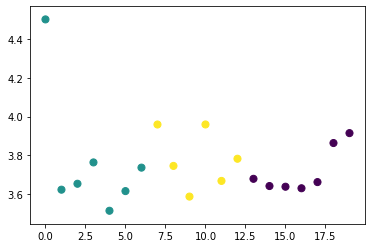

In [146]:
from sklearn.cluster import KMeans
my_dic2['Genre'] = my_dic2.index
pred = my_dic2[['Genre', 'rating']]
kmeans = KMeans(n_clusters=3)
kmeans.fit(pred)
y_kmeans = kmeans.predict(pred)
plt.scatter(pred.to_numpy()[:, 0], pred.to_numpy()[:, 1], c=y_kmeans, s=50, cmap='viridis')


So this graph shows no matter genre it is. People will hate it and love it. Woops. Will try a different way to do this.

The other one we tried was seeing if the number of reviews a movie got would affect the rating of the overall movie. As we can see by the clustering model we made down below. The movies with less than 50 reviews resulted in a wide range of ratings. While movies that had over 200 ratings had an average rating much higher than normal. This is because we can correlate the number of reviews to the popularity of the movie. Each reviewer will probably only watch movies they find interesting and engaging, so it will most likel be popular

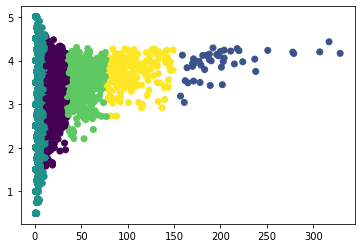

In [103]:
from sklearn.cluster import KMeans
pred = df_rate[['userId', 'rating']]
kmeans = KMeans(n_clusters=5)
kmeans.fit(pred)
y_kmeans = kmeans.predict(pred)
plt.scatter(pred.to_numpy()[:, 0], pred.to_numpy()[:, 1], c=y_kmeans, cmap='viridis')